In [2]:
# Linear Model

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_b=pd.read_csv("C:/Users/Dell/Downloads/boston_dataset.csv")

In [5]:
df_b.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df_b=df_b.drop("Unnamed: 0",axis=1)

In [7]:
df_b.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df_b.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [9]:
x=df_b.iloc[:,0:13]
y=df_b.iloc[:,13]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import r2_score

In [11]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [12]:
model_lm=LinearRegression()

In [13]:
mse,bias,variance=bias_variance_decomp(model_lm,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [14]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 24.992873247421052
bias 23.720867460410272
variance 1.2720057870107773


In [15]:
model_lm.fit(x_tr,y_tr)

LinearRegression()

In [16]:
p_tr=model_lm.predict(x_tr)

In [17]:
r2_score(y_tr,p_tr)

0.7337332767917557

In [18]:
p_lm=model_lm.predict(x_test)

In [19]:
r2_score(y_test,p_lm)

0.7555033086871304

In [20]:
model_lm.coef_

array([-8.14896492e-02,  4.80407782e-02, -5.47150249e-03,  3.06260576e+00,
       -1.61368815e+01,  3.67245067e+00, -8.51525259e-03, -1.51740854e+00,
        2.87271007e-01, -1.21207598e-02, -9.24160757e-01,  9.53460812e-03,
       -4.85895548e-01])

In [21]:
x_tr.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [22]:
lm_coef=pd.DataFrame({"features":x_tr.columns,"coef":model_lm.coef_})

In [23]:
lm_coef

,features,coef
0,crim,-0.081490
1,zn,0.048041
2,indus,-0.005472
3,chas,3.062606
4,nox,-16.136881
5,rm,3.672451
6,age,-0.008515
7,dis,-1.517409
8,rad,0.287271
9,tax,-0.012121


In [24]:
import seaborn as sns

<AxesSubplot:xlabel='features', ylabel='coef'>

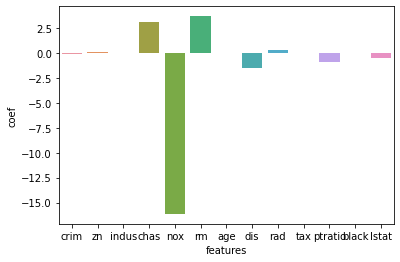

In [25]:
sns.barplot(x="features",y="coef",data=lm_coef)

# Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

In [27]:
model_ridge=Ridge(alpha=1.0) # make changes in alpha to reduce error 

In [28]:
mse,bias,variance=bias_variance_decomp(model_ridge,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [29]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 25.511995721145105
bias 24.258097493088872
variance 1.2538982280562316


In [30]:
model_ridge.fit(x_tr,y_tr)

Ridge()

In [31]:
p_tr=model_ridge.predict(x_tr)

In [32]:
p_ridge=model_ridge.predict(x_test)

In [33]:
r2_score(y_tr,p_tr)

0.7317557471152678

In [34]:
r2_score(y_test,p_ridge)

0.7500978146031212

In [35]:
model_ridge.coef_

array([-0.07719067,  0.0492339 , -0.03353812,  2.89707307, -8.90767261,
        3.7084372 , -0.01493201, -1.41030174,  0.27020095, -0.01286085,
       -0.8465646 ,  0.00990576, -0.4941423 ])

In [36]:
ridge_coef=pd.DataFrame({"features":x_tr.columns,"coef":model_ridge.coef_})

In [37]:
ridge_coef

,features,coef
0,crim,-0.077191
1,zn,0.049234
2,indus,-0.033538
3,chas,2.897073
4,nox,-8.907673
5,rm,3.708437
6,age,-0.014932
7,dis,-1.410302
8,rad,0.270201
9,tax,-0.012861


<AxesSubplot:xlabel='features', ylabel='coef'>

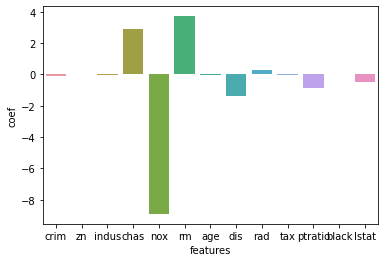

In [38]:
sns.barplot(x="features",y="coef",data=ridge_coef)

In [55]:
model_ridge=Ridge(alpha=2.0)

In [56]:
mse,bias,variance=bias_variance_decomp(model_ridge,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [57]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 25.775887186629998
bias 24.52690913636444
variance 1.2489780502655594


Error has increased. Try other values of alpha.

In [58]:
model_ridge=Ridge(alpha=0.01)

In [59]:
mse,bias,variance=bias_variance_decomp(model_ridge,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [60]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 24.999535500559126
bias 23.728114039203792
variance 1.271421461355333


MSE value had decreased.

In [61]:
model_ridge=Ridge(alpha=0.001)

In [62]:
mse,bias,variance=bias_variance_decomp(model_ridge,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [63]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 24.99353949601843
bias 23.72159314480972
variance 1.2719463512087092


In [64]:
model_ridge=Ridge(alpha=0.0001)

In [65]:
mse,bias,variance=bias_variance_decomp(model_ridge,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [66]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 24.992939872054517
bias 23.720940038807232
variance 1.2719998332472897


In [67]:
model_ridge=Ridge(alpha=3)

In [68]:
mse,bias,variance=bias_variance_decomp(model_ridge,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [69]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 25.923295535956104
bias 24.680145555733343
variance 1.2431499802227508


# Lasso Regression

In [39]:
from sklearn.linear_model import Lasso

In [40]:
model_lasso=Lasso(alpha=2.0)

In [41]:
mse,bias,variance=bias_variance_decomp(model_lasso,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [42]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 37.53969667225071
bias 36.64749355616429
variance 0.8922031160864204


In [43]:
model_lasso.fit(x_tr,y_tr)

Lasso(alpha=2.0)

In [44]:
p_lasso=model_lasso.predict(x_test)

In [45]:
r2_score(y_test,p_lasso)

0.6165599742642132

In [46]:
model_lasso.coef_

array([-0.        ,  0.03926957, -0.        ,  0.        , -0.        ,
        0.        ,  0.03704284, -0.05460344,  0.18042636, -0.01259089,
       -0.50924698,  0.00637041, -0.78271555])

In [47]:
lasso_coef=pd.DataFrame({"features":x_tr.columns,"coef":model_lasso.coef_})

In [48]:
lasso_coef

,features,coef
0,crim,-0.000000
1,zn,0.039270
2,indus,-0.000000
3,chas,0.000000
4,nox,-0.000000
5,rm,0.000000
6,age,0.037043
7,dis,-0.054603
8,rad,0.180426
9,tax,-0.012591


<AxesSubplot:xlabel='features', ylabel='coef'>

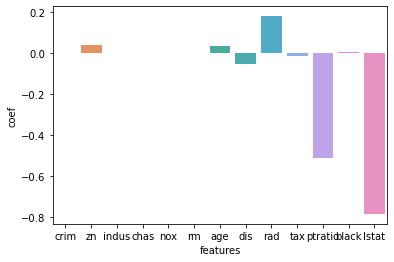

In [49]:
sns.barplot(x="features",y="coef",data=lasso_coef)

In [50]:
# Plot of Bias and Variance 

mse_list=[]
bias_list=[]
variance_list=[]
alpha_list=[x for x in range(1,21)]
for i in alpha_list:
    model=Ridge(alpha=i)
    mse,bias,variance=bias_variance_decomp(model,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)
    mse_list.append(mse)
    bias_list.append(bias)
    variance_list.append(variance)
    
    

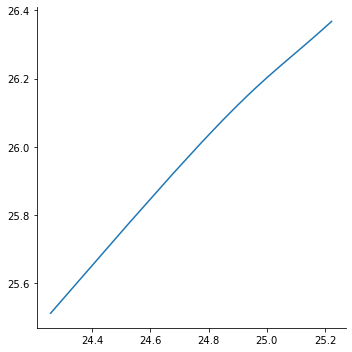

In [51]:
sns.relplot(x=bias_list,y=mse_list,kind="line")

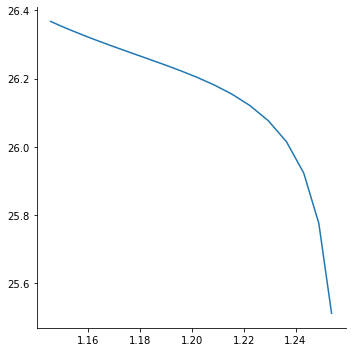

In [52]:
sns. relplot(x=variance_list,y=mse_list,kind="line")

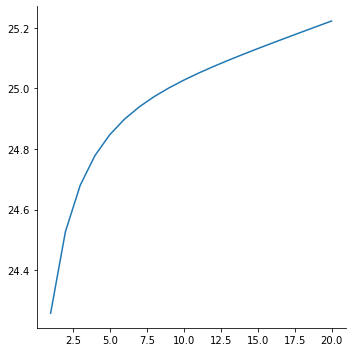

In [53]:
sns.relplot(x=alpha_list,y=bias_list,kind="line")

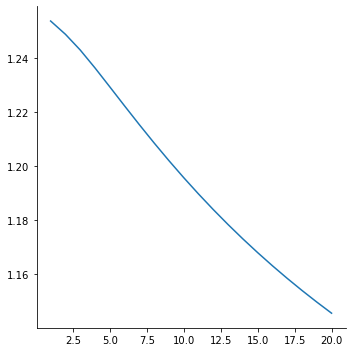

In [54]:
sns.relplot(x=alpha_list,y=variance_list,kind="line")